# Módulo de adquisición de datos

Para la adquisición de datos se usará la biblioteca COMCAT.

- Instalación de biblioteca COMCAT: https://github.com/usgs/libcomcat

- Documentación: http://usgs.github.io/libcomcat/apidoc/libcomcat.search.html

## Data Acquisition Example
### By JosTEL
### 24/03/2020
#### Based on ComCat Jupyter Notebooks on ComCat GitHub Repo

In [100]:
%matplotlib inline
from datetime import datetime
import io

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from libcomcat.search import get_event_by_id, search

import pandas as pd

import pickle

#### How to obtain seismic events ??

Syntax:
storage = search(starttime = datetime(year, month, day, hour, minute)
                 endtime = datetime(year, month, day, hour, minute)
                 minlatitude = ...,
                 maxlatitude = ...,
                 minlongitude = ...,
                 maxlongitude = ....,
                 orderby = "CRITERIO",
                 limit = ...)

##### With the latest variable, we store seismic events including:
* ID: USGS event ID
* Time: YYYY-MM-DD HH:MM:SS.MSSS
* Location: Ciudad, Pais
* Latitude: Coordenadas latitud
* Longitude: Coordenadas longitud
* Depth: profundidad en [km]
* Magnitude: Magnitud en escala Richter
* Alert: ...
* URL: URL del evento en USGS
* eventtype: tipo de evento detectado (Ej: earthquake)
* significance: ...

In [2]:
earthquake = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    minlatitude = -52.15,
                    maxlatitude = -18.1,
                    minlongitude = -73.3,
                    maxlongitude = -69.3,
                    orderby = "magnitude")

918
usp0009kwj 2000-01-08 11:59:21.840000 (-23.169,-70.122) 36.0 km M6.4
OrderedDict([('id', 'usp0009kwj'), ('time', datetime.datetime(2000, 1, 8, 11, 59, 21, 840000)), ('location', 'Antofagasta, Chile'), ('latitude', -23.169), ('longitude', -70.122), ('depth', 36), ('magnitude', 6.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009kwj'), ('eventtype', 'earthquake'), ('significance', 630)])
id usp0009kwj
time 2000-01-08 11:59:21.840000
location Antofagasta, Chile
latitude -23.169
longitude -70.122
depth 36
magnitude 6.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009kwj
eventtype earthquake
significance 630
usp0009kwj
usp0009kwj 2000-01-08 11:59:21.840000 (-23.169,-70.122) 36.0 km M6.4
['focal-mechanism', 'impact-text', 'moment-tensor', 'origin', 'phase-data', 'shakemap', 'trump-shakemap']
BEFORE PROPS
depth: 36.0
event-description: 59 km NNE of Antofagasta, Chile
event-type: ACTUAL
eventsource: atlas
eventsourcecode: 2000010

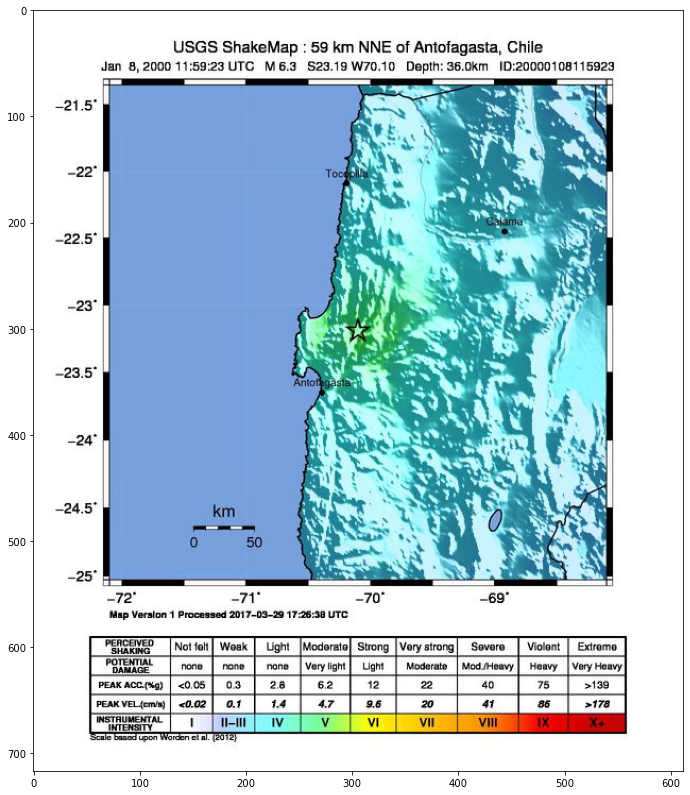

In [3]:
print(len(earthquake))
print(earthquake[0])
eq_dict = earthquake[0].toDict()
print(eq_dict)
#print(eq_dict.items())
for key, value in eq_dict.items():
    print(key, value)

print(eq_dict['id'])
usgs_id = eq_dict['id']
usgs_event = get_event_by_id(usgs_id)
print(usgs_event)
print(usgs_event.products)

print("BEFORE PROPS")
product = usgs_event.getProducts('shakemap')[0]
for prop in product.properties:
    print("%s: %s" % (prop, product[prop]))
    
print("SHAKEMAP props")
print(product.contents)

print("IMG SHAKEMAP")
img = product.getContentBytes('intensity.jpg')[0]
image = Image.open(io.BytesIO(img))
plt.figure(figsize = (12, 14))
plt.imshow(np.asarray(image))
plt.show()

### How to generate a visual map of the earthquake locations
#### Based on the notebooks in USGS ComCat GitHub Repo

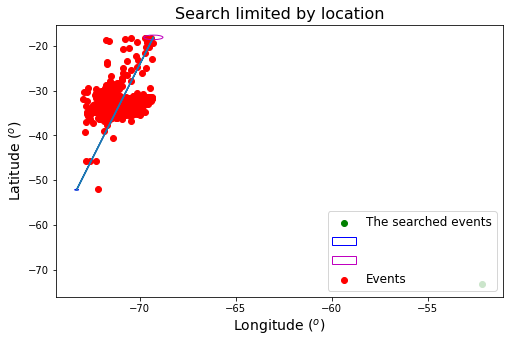

In [4]:
events_lat = [event.latitude for event in earthquake]
events_lon = [event.longitude for event in earthquake]

# Events inside a 1 km radius

km1_events = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    latitude = -52.15,
                    longitude = -73.3,
                    maxradiuskm = 1,
                    #minlatitude = -52.15,
                    #maxlatitude = -18.1,
                    #minlongitude = -73.3,
                    #maxlongitude = -69.3,
                    orderby = "magnitude"
                   )

# Events inside a 5 km radius

km5_events = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    latitude = -52.15,
                    longitude = -73.3,
                    maxradiuskm = 5,
                    #minlatitude = -52.15,
                    #maxlatitude = -18.1,
                    #minlongitude = -73.3,
                    #maxlongitude = -69.3,
                    orderby = "magnitude"
                   )

# Events considering a depth of 10km

km10_depth = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    latitude = -52.15,
                    longitude = -73.3,
                    maxradius = 1,
                    maxdepth = 10,
                    #minlatitude = -52.15,
                    #maxlatitude = -18.1,
                    #minlongitude = -73.3,
                    #maxlongitude = -69.3,
                    orderby = "magnitude"
                   )

# Plotting
fig, ax = plt.subplots(figsize = (8, 5))
the_events = ax.scatter(events_lon, events_lat, color = "r", label = "Events")
area_of_interest = ax.scatter(-52.15, -73.3, color = "g", label = "The searched events")
bounding_region = ax.plot([-73.3, -69.3, -69.3, -73.3, -73.3], [-52.15, -18.1, -18.1, -52.15, -52.15])
circle = plt.Circle((-73.3, -52.15), 0.1, color = "b", fill = False)
circle2 = plt.Circle((-69.3, -18.1), 0.5, color = "m", fill = False)
ax.add_artist(circle)
ax.add_artist(circle2)
ax.set_xlabel(r"Longitude ($^o$)", fontsize = 14)
ax.set_ylabel(r"Latitude ($^o$)", fontsize = 14)
ax.legend(handles = [area_of_interest, circle, circle2, the_events], fontsize = 12, loc = 4)
ax.set_title("Search limited by location", fontsize = 16)
plt.show()

## DSA following cud fetches dsa data we need for dsa projekt

### Earthquake data from Chile from 2000-2017
* Year
* Month
* Day
* Hour
* Minute
* Second
* Latitude
* Longitude
* Depth ([km])
* Maginutde (Richter Scale)

In [35]:
# Data until 03-04-2015
# This is because the USGS API doesn't fetch more than 20.000 records

data = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2018, 1, 1, 0, 0),
                    minlatitude = -54.07,
                    maxlatitude = -18.36,
                    minlongitude = -76.11,
                    maxlongitude = -71.71,
                    orderby = "magnitude")

In [36]:
print(len(data))
manipulate = [event.toDict() for event in data]
print(len(manipulate))

8802
8802


In [38]:
def date_extracter(date):
    formatted = date.strftime("%d-%m-%Y (%H:%M:%S.%f)")
    string_subsect = formatted.split(" ")
    # Date formatting
    date = string_subsect[0]
    date = date.split("-")
    #print(date)
    # Hour formatting
    hour = string_subsect[1]
    hour = hour[1:-2] # To cut the parenthesis
    hour = hour.split(":")
    hour[2] = hour[2][0:2]
    # Proper parsing
    parsed = list()
    for item in date:
        parsed.append(item)
    for item in hour:
        parsed.append(item)
    #print(parsed)
    return parsed
    #return date

def event_generator(date, lat, lon, depth, magnitude):
    #print(date)
    day = date[0]
    month = date[1]
    year = date[2]
    hour = date[3]
    minute = date[4]
    second = date[5]
    event = [year, month, day, hour, minute, second, lat, lon, depth, magnitude]
    return event

def event_extracter(events):
    event_formatted = list()
    for event in events:
        #print(event)
        for key, value in event.items():
            #print(key, value)
            if key == "time":
                #print("ASDF")
                #print(type(value))
                date = date_extracter(value)
                #print("DATE")
                #print(date)
            if key == "latitude":
                lat = value
                #print("LAT")
            if key == "longitude":
                lon = value
                #print("LON")
            if key == "depth":
                depth = value
                #print("DEPTH")
            if key == "magnitude":
                magnitude = value
                #print("MAG")
            #print(date)
            #print(lat)
            #print(lon)
            #print(depth)
            #print(magnitude)
        ev = event_generator(date, lat, lon, depth, magnitude)
        event_formatted.append(ev)
    return event_formatted

event_formatted = event_extracter(manipulate)

In [39]:
# Pandas DF formatting
df = pd.DataFrame(event_formatted, columns = ["Year", "Month", "Day", "Hour", "Minute", "Second", "Latitude", "Longitude", "Depth", "Magnitude"])
df

,Year,Month,Day,Hour,Minute,Second,Latitude,Longitude,Depth,Magnitude
0,2000,01,13,10,59,46,-45.7860,-72.2770,33.00,4.8
1,2000,01,13,07,03,36,-28.7540,-75.2860,33.00,4.7
2,2000,01,09,11,40,32,-37.8930,-73.4330,33.00,4.3
3,2000,01,27,12,44,50,-33.5280,-72.2740,33.00,4.5
4,2000,01,22,06,48,39,-31.7700,-72.0210,16.60,4.1
...,...,...,...,...,...,...,...,...,...,...
8797,2017,12,20,06,08,18,-32.5114,-71.8001,24.85,4.4
8798,2017,12,16,11,16,50,-30.6549,-71.7144,35.84,4.2
8799,2017,12,28,12,43,28,-38.1707,-75.2245,17.74,4.7
8800,2017,12,31,10,21,57,-31.9919,-71.8362,14.19,4.4


In [9]:
# 2nd approach. With coordinates given by AtlasFR

data2 = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2018, 1, 1, 0, 0),
                    minlatitude = -80.920202,
                    maxlatitude = -23.008541,
                    minlongitude = -69.469305,
                    maxlongitude = -55.635710,
                    orderby = "magnitude")

In [13]:
#event_formatted2 = event_extracter(data2)
#print(len(data2))
#print(data2[0])
#print(data2[1])
#for event in data2:
    #print(event)
events = [event.toDict() for event in data2]
#print(events)
event_formatted2 = event_extracter(events)
event_formatted2_array = np.asarray(event_formatted2)
# Pandas DF formatting
df2 = pd.DataFrame(event_formatted2_array, columns = ["Year", "Month", "Day", "Hour", "Minute", "Second", "Latitude", "Longitude", "Depth", "Magnitude"])
df2

,Year,Month,Day,Hour,Minute,Second,Latitude,Longitude,Depth,Magnitude
0,2000,01,05,17,55,11,-56.103,-58.442,10,5.6
1,2000,01,07,01,08,19,-28.21,-67.351,144.4,4.8
2,2000,01,01,04,30,10,-26.012,-68.803,105,4.5
3,2000,01,14,11,18,58,-23.214,-68.968,103.8,4.1
4,2000,01,07,11,49,11,-28.495,-69.196,120.1,4
...,...,...,...,...,...,...,...,...,...,...
4639,2017,12,10,01,28,47,-24.2092,-67.0641,201.1,4.2
4640,2017,12,12,12,43,35,-23.0887,-68.9116,97.17,4.1
4641,2017,12,24,12,04,25,-29.9971,-68.1149,53.88,4.5
4642,2017,12,26,00,05,14,-23.9888,-69.2606,87.25,4.4


In [26]:
# Dataset serialization
# This is to avoid fetching the data everytime we work with them
# For this, we will use the Pickle module
# Tutorial: https://programacion.net/articulo/los_pickles_de_python_1860

#print(event_formatted)
#print(event_formatted2)
pickled_data = open("data.pkl", "wb")
pickled_data2 = open("data2.pkl", "wb")
pickle.dump(event_formatted, pickled_data)
pickle.dump(event_formatted2, pickled_data2)

In [52]:
# Return pickled data
pickle_file = open("data.pkl", "rb")
recovered_data = pickle.load(pickle_file)
#print(recovered_data)

In [53]:
# Once the data is serialized, we procedure to order the seismic events according to their date
# This is to get a histogram of the data, first to study the data that we got
# Then, to know if the GIF function estimated from the estimator is correct or if it, at least, has any sense

def event_parser(event):
    year = int(event[0])
    month = int(event[1])
    day = int(event[2])
    hour = int(event[3])
    minute = int(event[4])
    second = int(event[5])
    lat = float(event[6])
    lon = float(event[7])
    depth = float(event[8])
    magnitude = float(event[9])
    date = datetime(year, month, day, hour, minute, second).strftime("%d-%m-%Y %H:%M:%S")
    #print(date)
    ev = [date, lat, lon, depth, magnitude]
    return ev
    
def second_formatting(events):
    formatted = list()
    count = 0
    for event in events:
        new_ev = list()
        #if (count == 10):
            #break
        #else:
        new_ev = event_parser(event)
        formatted.append(new_ev)
        #print(new_ev)
        #count +=1
    return formatted

refreshed_events = second_formatting(event_formatted)
#print(len(refreshed_events))
#print(refreshed_events)
#second_formatting(event_formatted
#if (refreshed_events[0][0] < refreshed_events[1][0]):
#    print("FIRST IS EARLIER")
#else:
#    print("SECOND IS EARLIER")


In [107]:
# Sort events
refreshed_events.sort(key = lambda date: datetime.strptime(date[0], '%d-%m-%Y %H:%M:%S'))
#print(refreshed_events)

In [60]:
# Now that we have the events sorted by date and time, we can now do an histogram plot of the data
# So we can see what dates have the most seismic events considering our time window analysis

def year_count(events):
    

# Pandas DF formatting
df3 = pd.DataFrame(refreshed_events, columns = ["Datetime", "Latitude", "Longitude", "Depth", "Magnitude"])
df3



,Datetime,Latitude,Longitude,Depth,Magnitude
0,09-01-2000 11:40:32,-37.8930,-73.4330,33.00,4.3
1,13-01-2000 07:03:36,-28.7540,-75.2860,33.00,4.7
2,13-01-2000 10:59:46,-45.7860,-72.2770,33.00,4.8
3,22-01-2000 06:48:39,-31.7700,-72.0210,16.60,4.1
4,22-01-2000 11:09:26,-40.4400,-73.3650,33.00,3.4
...,...,...,...,...,...
8797,20-12-2017 06:08:18,-32.5114,-71.8001,24.85,4.4
8798,21-12-2017 14:20:59,-33.8830,-72.4977,10.00,4.5
8799,28-12-2017 12:43:28,-38.1707,-75.2245,17.74,4.7
8800,29-12-2017 22:13:50,-30.4472,-72.2130,10.00,4.1


In [72]:
datetime.strptime(refreshed_events[0][0], '%d-%m-%Y %H:%M:%S').year

2000

[[2000, 280], [2001, 653], [2002, 575], [2003, 989], [2004, 474], [2005, 407], [2006, 499], [2007, 435], [2008, 330], [2009, 76], [2010, 1868], [2011, 362], [2012, 169], [2013, 123], [2014, 129], [2015, 830], [2016, 254], [2017, 349], [2018, 0]]


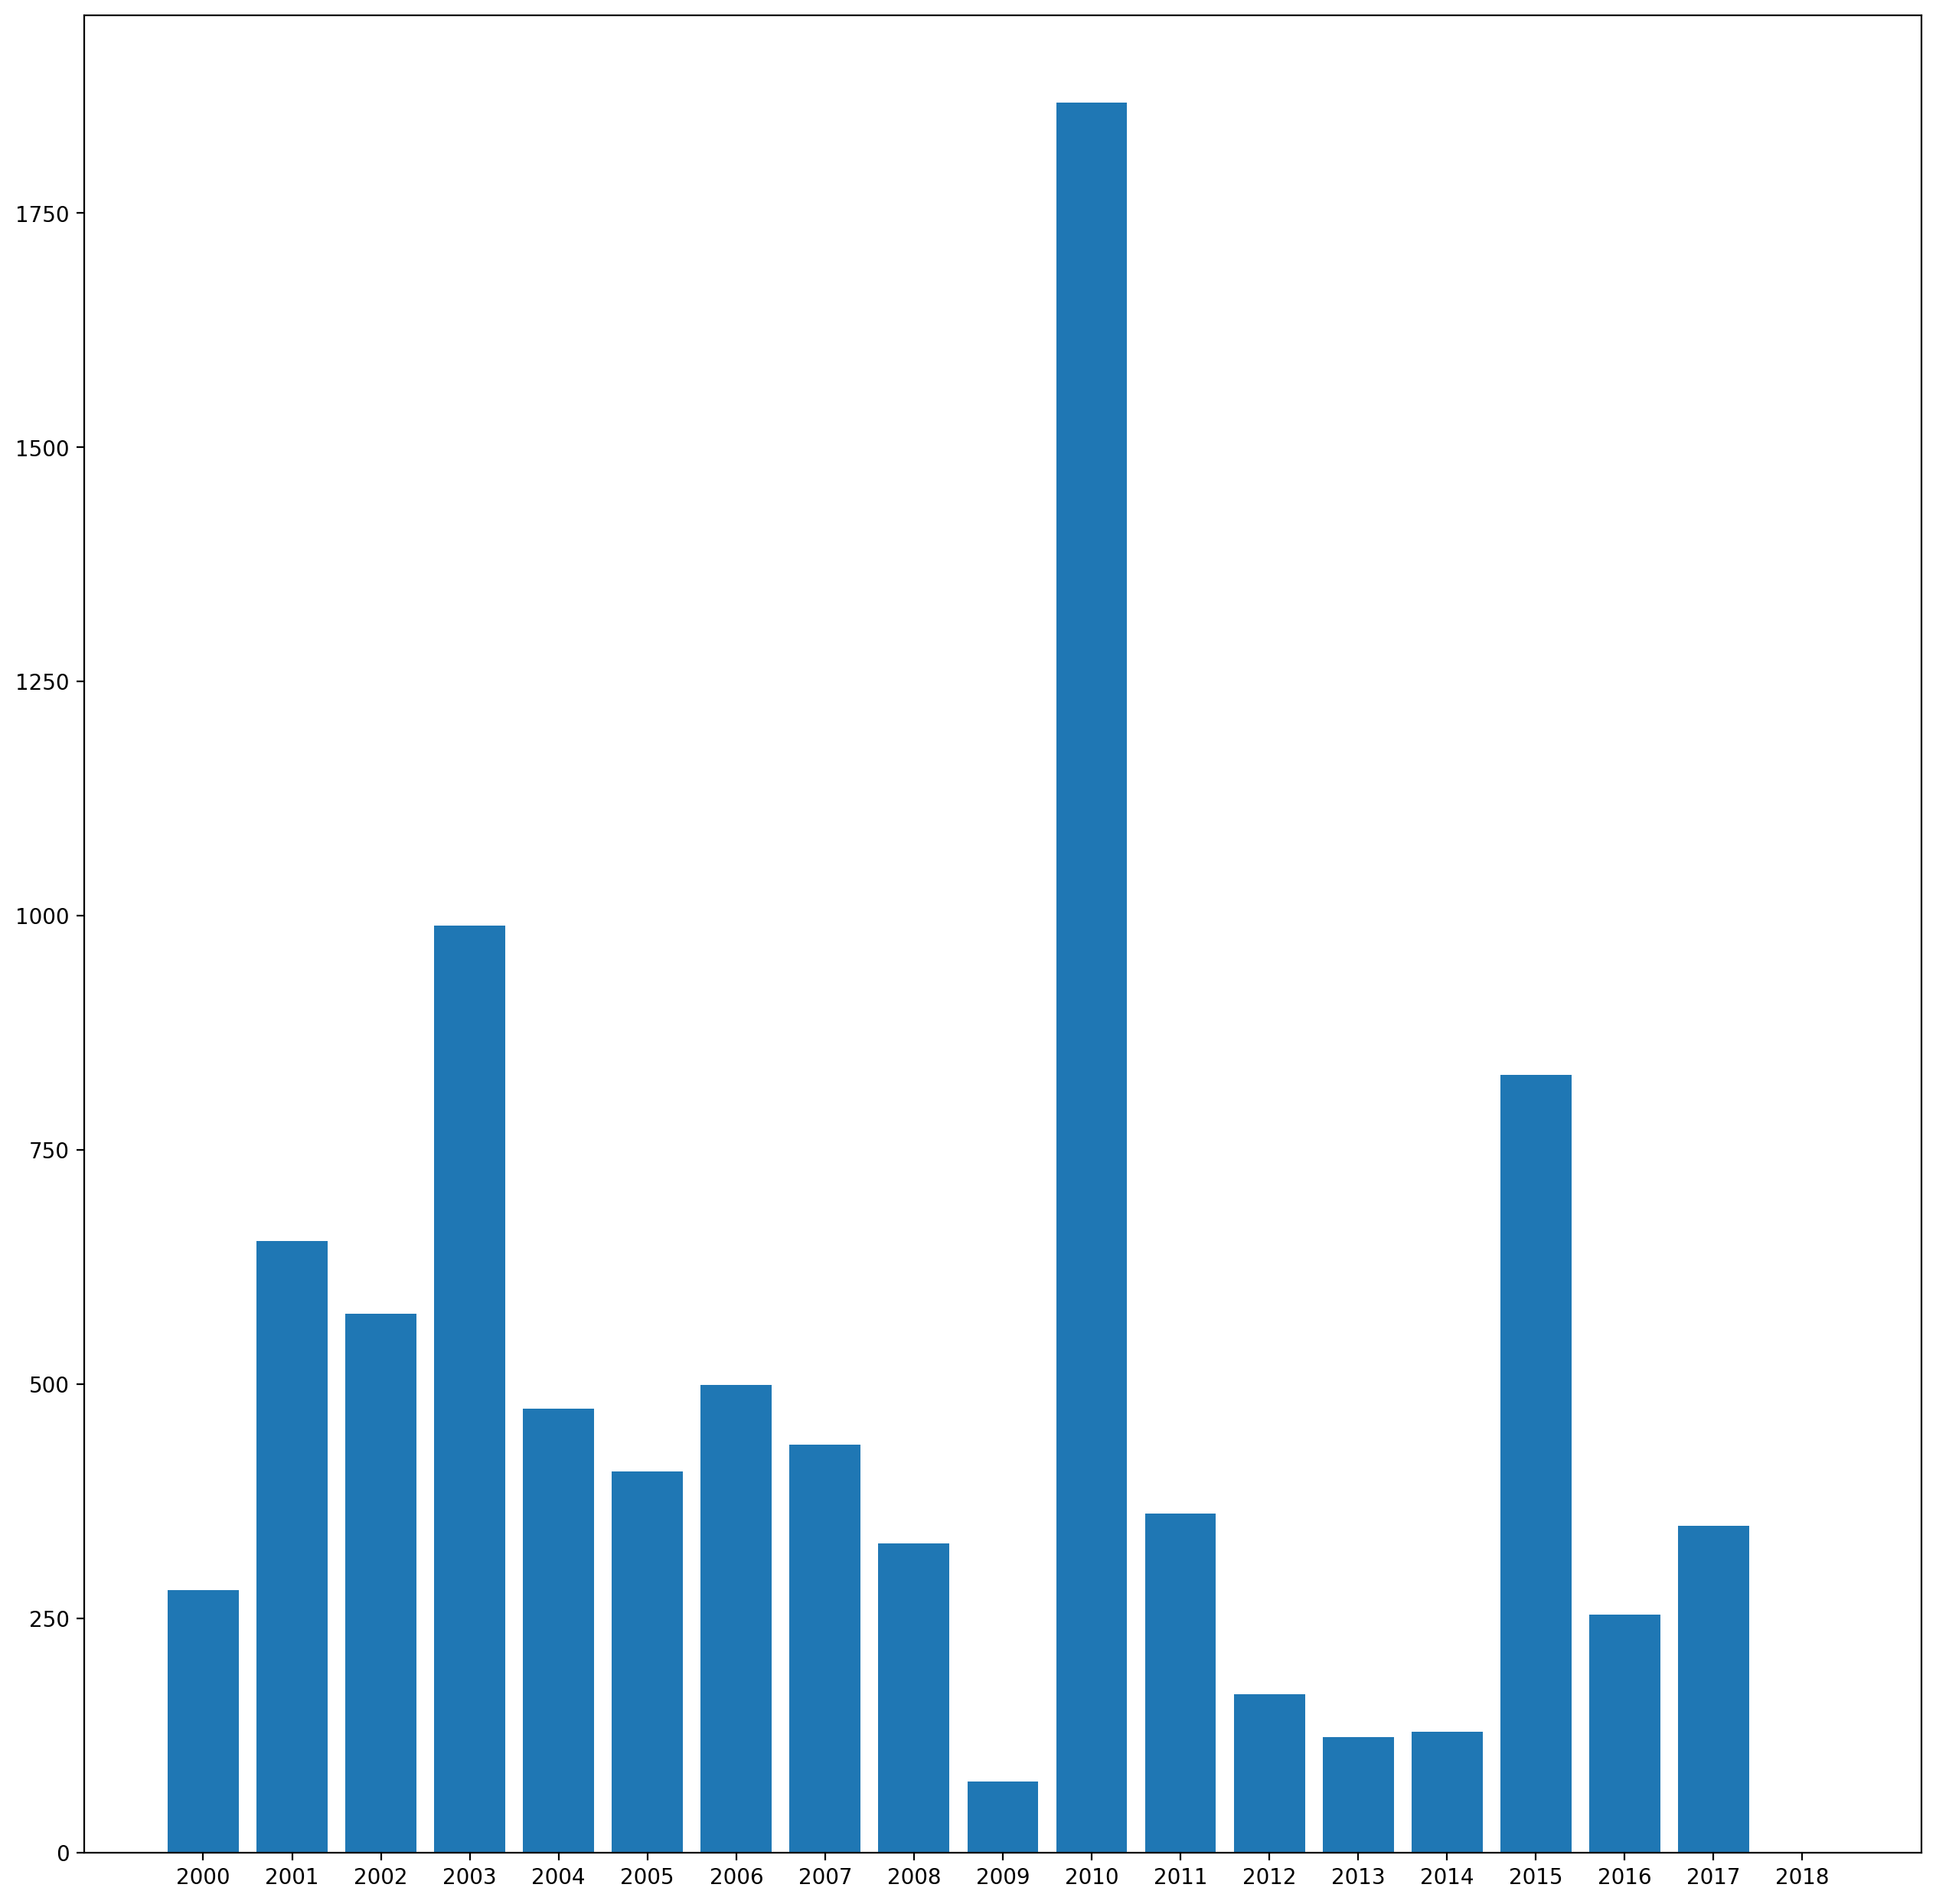

In [84]:
def year_initializer(init, end):
    evs = list()
    for i in range(init, end + 1):
        evs.append([i, 0])
    return evs

def event_counter(events):
    events_per_year = year_initializer(2000, 2018)
    for event in events:
        year_to_look = datetime.strptime(event[0], "%d-%m-%Y %H:%M:%S").year
        for event_per_year in events_per_year:
            if (event_per_year[0] == year_to_look):
                event_per_year[1] += 1
                break
            else:
                continue
    return events_per_year

events_per_year = event_counter(refreshed_events)
print(events_per_year)

fig = plt.figure(dpi = 200, figsize = (12, 12))
ax = fig.add_axes([0, 0, 1, 1])
years = [event_per_year[0] for event_per_year in events_per_year]
events = [event_per_year[1] for event_per_year in events_per_year]
ax.bar(years, events)
ax.set_xticks(years)
plt.show()

In [92]:
# Magnitude of earthquakes versus datetime

df3.loc[:, "Datetime"]
#df3.loc[:, "Magnitude"]

0       09-01-2000 11:40:32
1       13-01-2000 07:03:36
2       13-01-2000 10:59:46
3       22-01-2000 06:48:39
4       22-01-2000 11:09:26
               ...         
8797    20-12-2017 06:08:18
8798    21-12-2017 14:20:59
8799    28-12-2017 12:43:28
8800    29-12-2017 22:13:50
8801    31-12-2017 10:21:57
Name: Datetime, Length: 8802, dtype: object

In [89]:
df3.loc[:, "Magnitude"]

0       4.3
1       4.7
2       4.8
3       4.1
4       3.4
       ... 
8797    4.4
8798    4.5
8799    4.7
8800    4.1
8801    4.4
Name: Magnitude, Length: 8802, dtype: float64

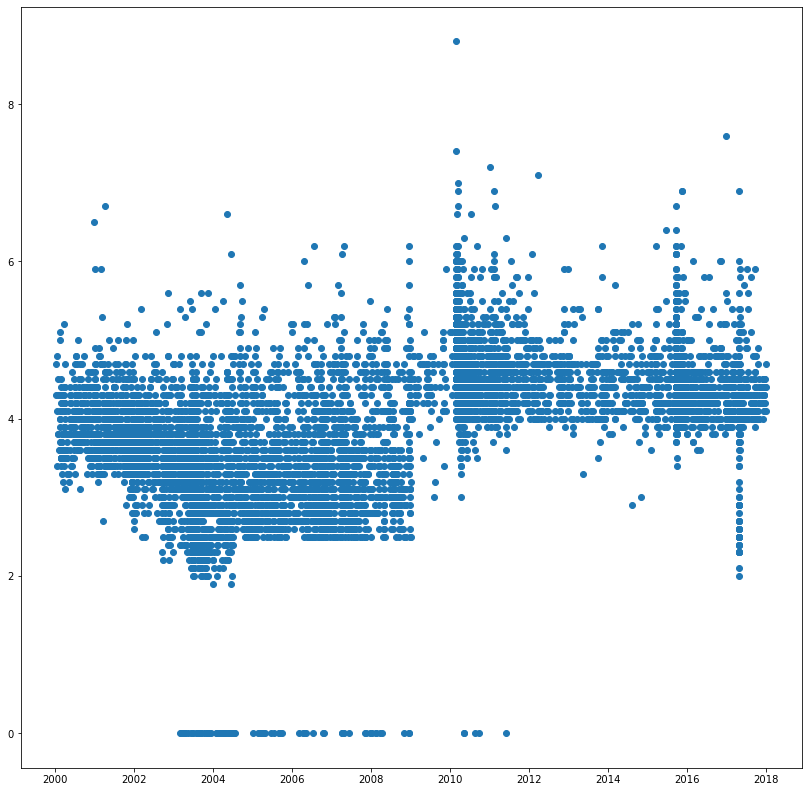

In [106]:
dates = [datetime.strptime(event[0], "%d-%m-%Y %H:%M:%S") for event in refreshed_events]
magnitudes = [event[-1] for event in refreshed_events]
#print(dates)
#print(magnitudes)

# Proper plotting
plt.figure(figsize = (14, 14))
dates = matplotlib.dates.date2num(dates)
plt.plot_date(dates, magnitudes)